<a href="https://colab.research.google.com/github/janakimeena/Python-for-Data-Science/blob/master/BPN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

## **Activation Function**

Function to introduce non-linearity

Should be differentiable

Monotonic function: A function which is either entirely non-increasing or non-decreasing.


Activation Functions can be basically divided into 2 types
1.   Linear Activation Function
2.   Non-linear Activation Functions




## Linear or Identity Activation Function

Equation : f(x) = x


## Sigmoid or Logistic Activation Function

curve looks like a S-shape.

exists between (0 to 1). Therefore, it is especially used for models where we have to predict the probability as an output

 ## Softmax function 
 
 More generalized logistic activation function which is used for multiclass classification

# Tanh or hyperbolic tangent Activation Function

The range of the tanh function is from (-1 to 1). 

tanh is also sigmoidal (s - shaped).


## ReLU (Rectified Linear Unit) Activation Function

Most used activation function in the world right now.Since, it is used in almost all the convolutional neural networks or deep learning.

f(z) is zero when z is less than zero and f(z) is equal to z when z is above or equal to zero.

In [0]:
# Sigmoid activation function
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

In [0]:
# Derivative of Sigmoid activation function
def sigmoid_derivative(x):
    return sigmoid(x) * (1.0 - sigmoid(x))


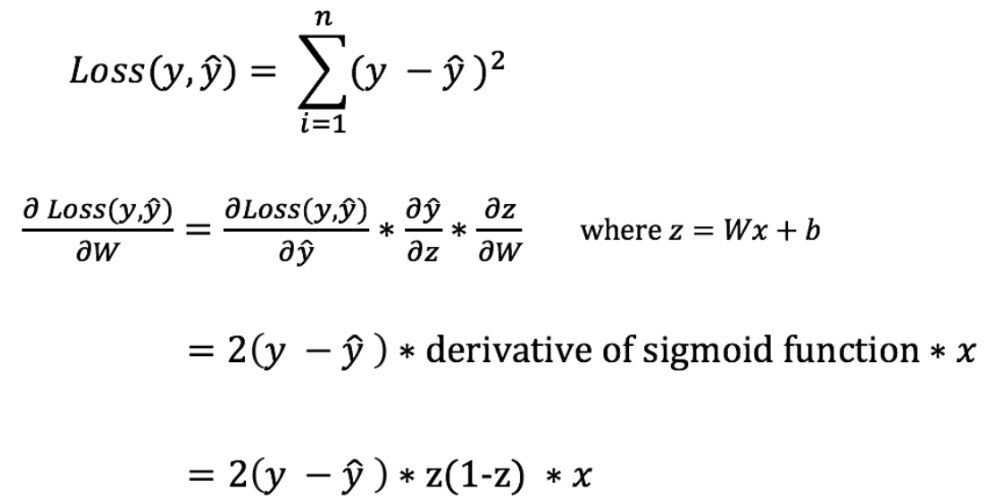

In [1]:
from IPython.display import Image
Image('../tmp/nn.jpg')

# Rule for back propagating error

Check how the change in the weight will make an influence in the loss

In [0]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        self.weights2   = np.random.rand(4,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)
        print("Input Shape",self.input.shape)
        print("Weights_1 Shape",self.weights1.shape)
        print("Weights_2 Shape",self.weights2.shape)
        print("Output Shape",self.output.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = - np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = - np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 -= 0.1 * d_weights1
        self.weights2 -= 0.1 * d_weights2

In [0]:
X = np.array([
[0, 0],
[0, 1],
[1, 0],
[1, 1]
])

Y = np.array([
    [0],
    [1],
    [1],
    [1]
])

'''X = np.array([
[0, 0],
[0, 1],
[1, 0],
[1, 1]
])

Y = np.array([
    [0],
    [0],
    [0],
    [1]
])'''

In [0]:
nn = NeuralNetwork(X,Y)

Input Shape (4, 2)
Weights_1 Shape (2, 4)
Weights_2 Shape (4, 1)
Output Shape (4, 1)


In [0]:
for i in range(3000):
    nn.feedforward()
    nn.backprop()

print(nn.output)

[[3.46334013e-04]
 [4.79324690e-01]
 [4.79545133e-01]
 [4.99652800e-01]]
